Задание 1 расчет вручную
Задание 2 вручную и пайтон, сравнить результаты
Задание 3 реализовать градиентный спуск самостоятельно, не использую готовые библиотеки.

если кому интересно, я строил рядом еще сходимость град спуска с momentum и функцию более подходящую для этого брал, можно побаловаться и посмотреть наглядно как инерция добавляет сходимости

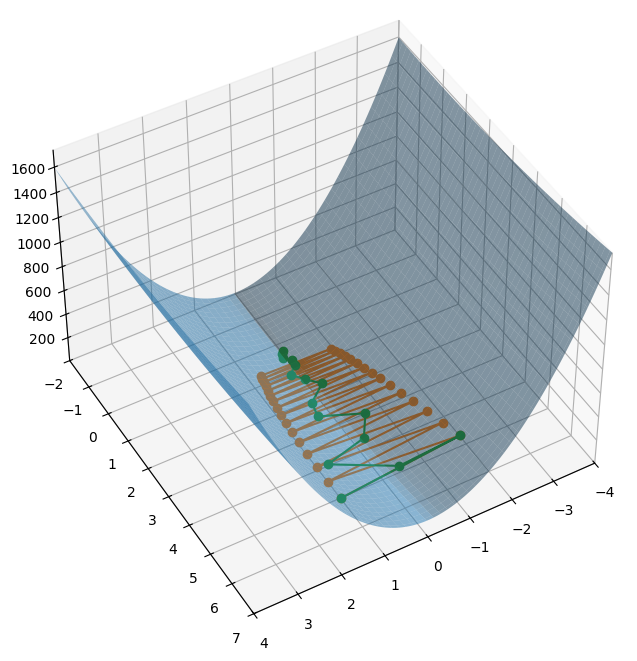

In [30]:

import numpy as np
import matplotlib.pyplot as plt

a, b = 99, 3
x=[1.5,6]

def fun(x, y):
    return a * (x ** 2) + b * (y ** 2)

def grad(x, y):
    return np.array([2 * a * x, 2 * b * y])

def grad_descend(grad, step_size=0.2, num_steps=30, x0=np.random.uniform(0, 3, size = 2)):
    lst = []
    lst.append(x0)
    for _ in range(num_steps):
        x0 = x0 - step_size * grad(x0[0], x0[1])
        lst.append(x0)
    return np.array(lst)

def grad_descend_momentum(grad, step_size=0.2, beta=0.9, num_steps=30, x0=np.random.uniform(0, 3, size = 2)):
    lst = []
    v = np.zeros_like(x0)
    lst.append(x0)
    for _ in range(num_steps):
        g = grad(x0[0], x0[1])
        v = beta * v + g
        x0 = x0 - step_size * v
        lst.append(x0)
    return np.array(lst)

def plot_grad(fun, trace, trace_m):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-4, 4, 100)
    y_ = np.linspace(-2, 7, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.5)
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    z_trace_m = fun(trace_m[:, 0], trace_m[:, 1])
    ax.plot(trace_m[:, 0], trace_m[:, 1], z_trace_m, "o-")

    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())
    ax.view_init(45, 60)
    
trace = grad_descend(grad, step_size=0.01, num_steps=30, x0=x)
trace_m  = grad_descend_momentum(grad, step_size=0.01, beta=0.6, num_steps=15, x0=x)

plot_grad(fun, trace = trace, trace_m=trace_m)

# Домашнее задание

## **Задача 1** 

#### Найдите экстремумы функции:

$$
f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8 .
$$

#### Распишите подробное решение.

### Задача 1. Нахождение экстремумов функции — 5 баллов 
1.1. Вычисление частных производных - 1 балл \
1.2. Составление системы уравнений - 1 балл \
1.3. Решение системы уравнений - 1 балл \
1.4. Анализ второго порядка - 1 балл \
1.5. Запись результата и выводов - 1 балл\

### **1.1. Вычисление частных производных**
В задаче представлена функция нескольких переменных $f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8$. Производные для функций нескольких переменных называются частными производными.


$$
\begin{align}
\text{Частная производная первого порядка f от x: }\hspace{1cm} f'_x &= 2 * 3 x^2 + 2 y + 2 z \\

\text{Частная производная первого порядка f от y: }\hspace{1cm} f'_y &= 2 x + 2 y + 2 \\

\text{Частная производная первого порядка f от z: }\hspace{1cm} f'_z &= 2 x + 2 z 
\end{align}
$$



### **1.2. Составление системы уравнений**
Далее необходимо найти точки, в которых частные производные принимают нулевые значения. Для этого необходимо приравнять частные производные к нулю и составить систему уравнений из полученных равенств.

Система уравнений частных производных, приравненных к нулю:
$$
 \begin{equation}
    \begin{cases}
        6 x^2 + 2 y + 2 z = 0\\
        2 x + 2 y + 2 = 0 \\
        2 x + 2 z = 0
    \end{cases}
\end{equation}
$$


### **1.3. Решение системы уравнений**
Полученную систему уравнений будем решать методом подстановки.

Для начала, так как все элементы системы имеют множители, кратные двум, упростим систему, поделив каждое уравнение на два:
$$
 \begin{equation}
 \left.
    \begin{cases}
        6 x^2 + 2 y + 2 z = 0\\
        2 x + 2 y + 2 = 0 \\
        2 x + 2 z = 0
    \end{cases}
    \right\| :2 \Rightarrow
    \left.
    \begin{cases}
        3 x^2 + y + z = 0\\
        x + y + 1 = 0 \\
        x + z = 0
    \end{cases}
    \right.
\end{equation}
$$

Далее из второго уравнения системы выразим $y$, из третьего уравнения выразим $z$, и подставим значения $y$ и $z$ в первое уравнение:
$$
 \begin{equation}
 \left.
    \begin{cases}
        3 x^2 + (- x - 1) + (-x) = 0\\
        y = - x - 1 \\
        z = - x
    \end{cases}
    \right.\Rightarrow
    \left.
    \begin{cases}
        3 x^2 - x - 1 -x = 0\\
        y = - x - 1 \\
        z = - x
    \end{cases}
    \right.\Rightarrow
    \left.
    \begin{cases}
        3 x^2 - 2 x - 1 = 0\\
        y = - x - 1 \\
        z = - x
    \end{cases}
    \right.
\end{equation}
$$


Для нахождения значения $x$ необходимо решить квадратное уравнение $3 x^2 - 2 x - 1 = 0$, для этого воспользуемся теоремой Виета. Теорема Виета устанавливает связь между корнями квадратного уравнения $ax^{2}+bx+c=0$ и его коэффициентами: сумма корней $x_{1}+x_{2}$ равна $-b/a$, а произведение корней $x_{1}\cdot x_{2}$ равно $c/a$.
Для нашего случая:
1) Cумма корней $\hspace{0.5cm}x_{1}+x_{2} = -b/a = -(-2/3) = \frac{2}{3}$

2) Произведение корней $\hspace{0.5cm}x_{1}\cdot x_{2} = c/a = -1/3 = -\frac{1}{3}$

Далее методом подбора находим значения корней $x_{1}$, $x_{2}$:
1) $x_{1} = 1$ \
Проверим, подставив значение в уравнение: $\hspace{0.5cm}3*1^2 - 2*1 - 1 = 0 \hspace{0.5cm}\Rightarrow\hspace{0.5cm} 3 - 2 - 1 = 0 \hspace{0.5cm}\Rightarrow\hspace{0.5cm} 0 = 0$

2) $x_{2} = -\frac{1}{3}$ \
Проверим, подставив значение в уравнение: $\hspace{0.5cm}3*(-\frac{1}{3})^2 - 2*(-\frac{1}{3}) - 1 = 0 \hspace{0.5cm}\Rightarrow\hspace{0.5cm} 3 * \frac{1}{9} + \frac{2}{3} - 1 = 0\hspace{0.5cm}\Rightarrow\hspace{0.5cm}\frac{3}{9} + \frac{2}{3} - 1 = 0\hspace{0.5cm}\Rightarrow\hspace{0.5cm} 1 - 1 = 0\hspace{0.5cm}\Rightarrow\hspace{0.5cm} 0 = 0$

Далее найдем значения остальных переменных, подставив значения $x_{1}$, $x_{2}$ в систему уравнений:

1) Для $x_{1} = 1$

$$
 \begin{equation}
 \left.
    \begin{cases}
        3 * 1^2 - 2 * 1 - 1 = 0\\
        y = - 1 - 1 \\
        z = - 1
    \end{cases}
    \right.\Rightarrow
    \left.
    \begin{cases}
        0 = 0\\
        y = - 2 \\
        z = - 1
    \end{cases}
    \right.
 \end{equation}
$$

$$
x_{1} = 1;\hspace{0.5cm} y_{1} = -2;\hspace{0.5cm} z_{1} = -1
$$
2) Для $x_{2} = -\frac{1}{3}$

$$
 \begin{equation}
 \left.
    \begin{cases}
        3 * (-\frac{1}{3})^2 - 2 * (-\frac{1}{3}) - 1 = 0\\
        y = - (-\frac{1}{3}) - 1 \\
        z = - (-\frac{1}{3})
    \end{cases}
    \right.\Rightarrow
    \left.
    \begin{cases}
        0 = 0\\
        y = -\frac{2}{3} \\
        z = \frac{1}{3}
    \end{cases}
    \right.
 \end{equation}
$$

$$
x_{2} = -\frac{1}{3};\hspace{0.5cm} y_{2} = -\frac{2}{3};\hspace{0.5cm} z_{2} = \frac{1}{3}
$$

### **1.4. Анализ второго порядка**
Необходимое условие экстремума функции: если дифференцируемая функция $f(x, y, z)$ имеет экстремум в некоей точке, то все три производные первого порядка в данной точке равны нулю. Такую точку называют стационарной. В нашем случае стационарных точек две, назовем их $M_1$ и $M_2$: $M_1(1;-2;-1)$ и $M_2(-\frac{1}{3};-\frac{2}{3};\frac{1}{3})$.
Далее для проверки наличия экстремума необходимо найти все частные производные второго порядка, вычислить их в точках $M_1$ и $M_2$, составить матрицу Гессе.
Найдем все частные производные второго порядка:

$$
\begin{align}
\text{Частная производная первого порядка f от x: }\hspace{1cm} f'_x &= 2 * 3 x^2 + 2 y + 2 z \\

\text{Частная производная первого порядка f от y: }\hspace{1cm} f'_y &= 2 x + 2 y + 2 \\

\text{Частная производная первого порядка f от z: }\hspace{1cm} f'_z &= 2 x + 2 z 
\end{align}
$$

$$
\begin{align}
\text{Частная производная второго порядка $f'_x$ по x: }\hspace{1cm} f''_{xx} &= 12 x\\

\text{Частная производная второго порядка $f'_y$ по y: }\hspace{1cm} f''_{yy} &= 2 \\

\text{Частная производная второго порядка $f'_z$ по z: }\hspace{1cm} f''_{zz} &= 2 \\
\end{align}
$$

$$
\begin{align}
\text{Смешанная частная производная второго порядка $f'_x$ по y: }\hspace{1cm} f''_{xy} &= 2\\

\text{Смешанная частная производная второго порядка $f'_x$ по z: }\hspace{1cm} f''_{xz} &= 2\\

\text{Смешанная частная производная второго порядка $f'_y$ по x: }\hspace{1cm} f''_{yx} &= 2\\

\text{Смешанная частная производная второго порядка $f'_y$ по z: }\hspace{1cm} f''_{yz} &= 0\\

\text{Смешанная частная производная второго порядка $f'_z$ по x: }\hspace{1cm} f''_{zx} &= 2\\

\text{Смешанная частная производная второго порядка $f'_z$ по y: }\hspace{1cm} f''_{zy} &= 0\\
\end{align}
$$

Далее вычислим значания частных производных второго порядка в стационарных точках. В нашем случае все производные второго порядка, кроме $f''_{xx}$, равны константам, а значит и в стационарных точках они тоже будут равны константам. Вычислим значение $f''_{xx}$ в стационарных точках:

1) В точке $M_1(1;-2;-1)$:
$
\hspace{0.5cm}
f''_{xx}(M_1) = 12 * 1 = 12
$

2) В точке $M_2(-\frac{1}{3};-\frac{2}{3};\frac{1}{3})$:
$
\hspace{0.5cm}
f''_{xx}(M_2) = 12 * (-\frac{1}{3}) = -4
$

Далее составим матрицы Гессе. В нашем случае их две:
$$
Hesse_1 =
\begin{pmatrix}
f''_{xx}(M_1) & f''_{xy} & f''_{xz} \\
f''_{yx} & f''_{yy} & f''_{yx} \\
f''_{zx} & f''_{zy} & f''_{zz}
\end{pmatrix}
=
\begin{pmatrix}
12 & 2 & 2 \\
2 & 2 & 0 \\
2 & 0 & 2
\end{pmatrix}
$$    

$$
Hesse_2 =
\begin{pmatrix}
f''_{xx}(M_2) & f''_{xy} & f''_{xz} \\
f''_{yx} & f''_{yy} & f''_{yx} \\
f''_{zx} & f''_{zy} & f''_{zz}
\end{pmatrix}
=
\begin{pmatrix}
-4 & 2 & 2 \\
2 & 2 & 0 \\
2 & 0 & 2
\end{pmatrix}
$$  

Далее нужно вычислить угловые миноры. Это определители, которые "разрастаются" из левого верхнего угла.
1) Для матрицы $Hesse_1$(миноры обозначим $\delta$):
$$
Hesse_1 =
\begin{pmatrix}
12 & 2 & 2 \\
2 & 2 & 0 \\
2 & 0 & 2
\end{pmatrix}
$$

$$
\delta_{11} =
\begin{vmatrix}
12
\end{vmatrix}
= 12
$$

$$
\delta_{12} =
\begin{vmatrix}
12 & 2 \\
2 & 2 \\
\end{vmatrix}
= 12*2 - 2*2 = 24 - 4 = 20
$$

$$
\delta_{13} =
\begin{vmatrix}
12 & 2 & 2 \\
2 & 2 & 0 \\
2 & 0 & 2
\end{vmatrix}
= 12*2*2 + 2*2*0 + 2*0*2 - 2*2*2 -12*0*0 -2*2*2 = 48 + 0 + 0 - 8 - 0 - 8 = 32
$$

$\delta_{11} = 12 > 0$, $\delta_{12} = 20 > 0$, $\delta_{13} = 32 > 0$, все угловые миноры матрицы $Hesse_1$ положительны, следовательно и сама матрица положительно определена в точке $M_1(1;-2;-1)$, а это значит, что для функции $f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8$ в точке $M_1$ находится минимум.

2) Для матрицы $Hesse_2$(миноры обозначим $\delta$):
$$
Hesse_2 =
\begin{pmatrix}
-4 & 2 & 2 \\
2 & 2 & 0 \\
2 & 0 & 2
\end{pmatrix}
$$

$$
\delta_{21} =
\begin{vmatrix}
-4
\end{vmatrix}
= -4
$$

$$
\delta_{22} =
\begin{vmatrix}
-4 & 2 \\
2 & 2 \\
\end{vmatrix}
= -4*2 - 2*2 = -8 - 4 = -12
$$

$$
\delta_{23} =
\begin{vmatrix}
-4 & 2 & 2 \\
2 & 2 & 0 \\
2 & 0 & 2
\end{vmatrix}
= -4*2*2 + 2*2*0 + 2*0*2 - 2*2*2 -(-4)*0*0 -2*2*2 = -16 + 0 + 0 - 8 - 0 - 8 = -32
$$

$\delta_{21} = -4 < 0$, $\delta_{22} = -12 < 0$, $\delta_{23} = -32 < 0$, все угловые миноры матрицы $Hesse_2$ отрицательны. Для того, чтобы матрица была положительно определённой, необходимо, чтобы все её угловые миноры, либо все собственные значения были положительными. А для того, чтобы матрица была отрицательно определённой, необходимо, чтобы знаки угловых миноров чередовались, начиная с отрицательного, либо чтобы все собственные значения были отрицательными. В случае матрицы $Hesse_2$ не выполняются ни первое, ни второе условие, а значит, что для функции $f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8$ точка $M_2(-\frac{1}{3};-\frac{2}{3};\frac{1}{3})$ является седловой, то есть точкой, в которой функция не имеет ни локального минимума, ни локального максимума.

### **1.5. Запись результата и выводов**
По условиям задачи необходимо было найти экстремум функции $\hspace{0.5cm}f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8$. 

Для поиска экстремума необходимо было найти стационарные точки, в которых возможен экстремум. А также классифицировать стационарные точки, чтобы определить существует ли экстремумы в данных точках.

В процессе решения были найдены частные производные первого порядка, также были найдены стационарные точки, в которых все производные первого порядка равны нулю $M_1(1;-2;-1)$ и $M_2(-\frac{1}{3};-\frac{2}{3};\frac{1}{3})$.

Далее были найдены частные производные второго порядка, а также их значения в стационарных точках. Далее из частных производных второго порядка были составлены матрицы Гессе, в результате анализа которых было выяснено, что для функции $f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8$ в точке $M_1$ находится минимум, так как матрица Гессе в этой точке положительно определена, а точка $M_2(-\frac{1}{3};-\frac{2}{3};\frac{1}{3})$ для функции $f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8$ является седловой, то есть точкой, в которой функция не имеет ни локального минимума, ни локального максимума.

Условия задачи выполнены, экстремум найден.




## **Задача 2** 

### Найдите условные экстремумы функции:

$$
 f(x, y)=4 x+8 y, y^2-2 x y+5=0
$$

### Вычислите результат самостоятельно (вручную) и с помощью Python. Сравните результаты.

### **Задача 2(9 баллов)** 
1) Составление функции множителей Лагранжа - 1 балл
2) Вычисление частных производных и составление системы уравнений - 1 балл
3) Решение системы вручную - 2 балла
4) Реализация вычислений с помощью Python - 2 балла
5) Сравнение результатов - 1 балл
6) Формулирование итоговых выводов - 2 балла

### **1) Составление функции множителей Лагранжа**

Нам необходимо найти экстремумы функции $f(x, y)=4 x+8 y$ при условии $y^2-2 x y+5=0$. Находить экстремумы будем с помощью метода множителей Лагранжа. Для этого необходимо составить функцию Лагранжа, то есть объединить целевую функцию и функцию ограничений внутри одного выражения.

$$
 L(x, y, \lambda) = 4 x+8 y + \lambda(y^2-2 x y+5)
$$

### **2) Вычисление частных производных и составление системы уравнений**

Далее порядок решения задачи такой же, как и при поиске безусловного экстремума. Необходимо вычислить частные производные первого порядка функции Лагранжа, приравнять их к нулю, составить из них систему уравнений и решить ее. Решения системы уравнений будут координатами стационарных точек.

#### 2.1) Найдем частные производные первого порядка:

$$
\begin{align}
\text{Частная производная первого порядка L от x: }\hspace{1cm} L'_x &= 4 - \lambda * 2 * y \\

\text{Частная производная первого порядка L от y: }\hspace{1cm} L'_y &= 8 + \lambda * 2 * y - \lambda * 2 * x \\

\text{Частная производная первого порядка L от $\lambda$: }\hspace{1cm} L'_\lambda &= y^2-2 x y+5 
\end{align}
$$

#### 2.1) Составим систему уравнений частных производных первого порядка, приравненных к нулю:

$$
 \begin{equation}
    \begin{cases}
        4 - \lambda 2 y = 0\\
        8 + \lambda 2 y - \lambda 2 x = 0 \\
        y^2-2 x y+5 = 0
    \end{cases}
\end{equation}
$$

#### **3) Решение системы вручную**
Полученную систему уравнений будем решать методом подстановки.

Для начала, ко второму уравнению системы прибавим первое, далее из первого выразим $y$, а из второго $x$, и подставим значения $y$ и $x$ в третье уравнение:
$$
 \begin{equation}
    \left.
    \begin{cases}
        4 - \lambda 2 y = 0\\
        8 + \lambda 2 y - \lambda 2 x = 0 \\
        y^2-2 x y+5 = 0
    \end{cases}
    \right\| (1) + (2) \Rightarrow
    \left.
    \begin{cases}
        4 - \lambda 2 y = 0\\
        12 - \lambda 2 x = 0 \\
        y^2-2 x y+5 = 0
    \end{cases}
    \right. \Rightarrow
    \left.
    \begin{cases}
        y = \frac{2}{\lambda}\\
        x = \frac{6}{\lambda} \\
        (\frac{2}{\lambda})^2-2 (\frac{6}{\lambda}) (\frac{2}{\lambda})+5 = 0
    \end{cases}
    \right.
\end{equation}
$$

Для нахождения значения $\lambda$ необходимо решить квадратное уравнение $(\frac{2}{\lambda})^2-2 (\frac{6}{\lambda}) (\frac{2}{\lambda})+5 = 0$, раскроем скобки и упростим его:
$$
\Bigl(\frac{2}{\lambda}\Bigr)^2-2 \Bigl(\frac{6}{\lambda}\Bigr) \Bigl(\frac{2}{\lambda}\Bigr)+5 = 0 
\hspace{0.5cm}\Rightarrow\hspace{0.5cm} 4*\frac{1}{\lambda^2}-24 *\frac{1}{\lambda^2} +5 = 0 
\hspace{0.5cm}\Rightarrow\hspace{0.5cm} \left.-20 *\frac{1}{\lambda^2} = -5 \right\|:(-20) 
\hspace{0.5cm}\Rightarrow\hspace{0.5cm} \frac{1}{\lambda^2} = \frac{1}{4}
\hspace{0.5cm}\Rightarrow\hspace{0.5cm} \lambda = \sqrt[2]{4}
\hspace{0.5cm}\Rightarrow\hspace{0.5cm} \lambda_1 = 2; \hspace{0.5cm} \lambda_2 = -2
$$

Далее найдем значения остальных переменных, подставив значения $\lambda_1$, $\lambda_2$ в систему уравнений:

1) Для $\lambda_1 = 2$

$$
 \begin{equation}
    \left.
    \begin{cases}
        y = \frac{2}{2}\\
        x = \frac{6}{2} \\
        (\frac{2}{2})^2-2 (\frac{6}{2}) (\frac{2}{2})+5 = 0
    \end{cases}
    \right.\Rightarrow
    \left.
    \begin{cases}
        y = 1\\
        x = 3 \\
        0 = 0
    \end{cases}
    \right.
 \end{equation}
$$

$$
x_{1} = 3;\hspace{0.5cm} y_{1} = 1;\hspace{0.5cm} \lambda_1 = 2
$$
2) Для $\lambda_2 = -2$

$$
 \begin{equation}
    \left.
    \begin{cases}
        y = \frac{2}{-2}\\
        x = \frac{6}{-2} \\
        (\frac{2}{-2})^2-2 (\frac{6}{-2}) (\frac{2}{-2})+5 = 0
    \end{cases}
    \right.\Rightarrow
    \left.
    \begin{cases}
        y = -1\\
        x = -3 \\
        0 = 0
    \end{cases}
    \right.
 \end{equation}
$$

$$
x_{2} = -3;\hspace{0.5cm} y_{2} = -1;\hspace{0.5cm} \lambda_2 = -2
$$

Получены стационарные точки, назовем их $M_1(3;1)$ и $M_2(-3,-1)$. Для определения точек максимума и минимума найдем значения целевой функции в стационарных точках:
1) Для точки $M_1(3;1)$:
$$
f(3,1) = 4 x+8 y = 4 * 3 + 8 * 1 = 12 + 8 = 20
$$
1) Для точки $M_2(-3;-1)$:
$$
f(-3,-1) = 4 x+8 y = 4 * (-3) + 8 * (-1) = -12 + -8 = -20
$$

Таким образом большее значение $f(M_1) = 20$  - это условный максимум, меньшее значение $f(M_2) = -20$ - это условный минимум.


#### 4) Реализация вычислений с помощью Python

In [28]:
from sympy import *
x,y,l=symbols(' x y l' ) # Переменные функции Лагранжа
g = 4*x + 8*y 
print('Целевая функция для аргументов x и y : f(x,y) = ', g)
q = y**2 - 2*x*y + 5
print('Функция ограничений: ', q,'= 0')
f = 4*x + 8*y + l*(y**2 - 2*x*y + 5)
print('Функция Лагранжа : ',f)
fx = f.diff(x)
print('df/dx =',fx,'= 0')
fy = f.diff(y)
print('df/dy =',fy,'= 0')
fl = f.diff(l)
print('df/dl =',fl,'= 0')
sols = solve([fx,fy,fl],x,y,l)
print('Стационарная точка M1(x,y):\n(',float(sols[0][0]),';',float(sols[0][1]),')')
print('Стационарная точка M2(x,y):\n(',float(sols[1][0]),';',float(sols[1][1]),')')
print('Значение целевой функции в точке M1(-3;-1) f(-3,-1) = ',4*(-3) + 8*(-1))
print('Значение целевой функции в точке M2(3;1) f(3,1) = ',4*3 + 8*1)

Целевая функция для аргументов x и y : f(x,y) =  4*x + 8*y
Функция ограничений:  -2*x*y + y**2 + 5 = 0
Функция Лагранжа :  l*(-2*x*y + y**2 + 5) + 4*x + 8*y
df/dx = -2*l*y + 4 = 0
df/dy = l*(-2*x + 2*y) + 8 = 0
df/dl = -2*x*y + y**2 + 5 = 0
Стационарная точка M1(x,y):
( -3.0 ; -1.0 )
Стационарная точка M2(x,y):
( 3.0 ; 1.0 )
Значение целевой функции в точке M1(-3;-1) f(-3,-1) =  -20
Значение целевой функции в точке M2(3;1) f(3,1) =  20


#### 5) Сравнение результатов
При решении системы уравнений вручную получились следующие результаты:

$$
x_{1} = 3;\hspace{0.5cm} y_{1} = 1;\hspace{0.5cm} \lambda_1 = 2
$$
$$
x_{2} = -3;\hspace{0.5cm} y_{2} = -1;\hspace{0.5cm} \lambda_2 = -2
$$
Получены стационарные точки $M_1(3;1)$ и $M_2(-3,-1)$\
Найдены значения целевой функции в стационарных точках  $f(M_1) = 20$, $f(M_2) = -20$

При реализации вычислений с помощью Python получены идентичные результаты. Что подтверждает вычисления вручную.

#### 6) Формулирование итоговых выводов

По условиям задачи необходимо было найти экстремум целевой функции $\hspace{0.5cm} f(x, y)=4 x+8 y$ при условии  $y^2-2 x y+5=0$.

Для поиска экстремума необходимо было составить функцию Лагранжа, найти стационарные точки, найти значения целевой функции в стационарных точках для определения условных экстремумов.

В процессе решения были найдены частные производные первого порядка, была составлена система уравнений частных производных первого порядка, приравненных к нулю. Решение системы уравнений было реализовано двумя способами: вручную и с помощью Python, оба способа показали идентичные результаты, что косвенно подтверждает правильность вычислений. Также были найдены стационарные точки, в которых определяется условный экстремум функции. Далее найдены значения целевой функции в стационарных точках  $f(M_1) = 20$, $f(M_2) = -20$. Таким образом делаем вывод, что в точке $M_1(3;1)$ находится максимум целевой функции  $f(x, y)=4 x+8 y$ при условии $y^2-2 x y+5=0$, в в точке $M_2(-3,-1)$ находится минимум целевой функции $ f(x, y)=4 x+8 y$ при условии $y^2-2 x y+5=0$.


Условия задачи выполнены, условные экстремумы найдены.


## **Задача 3** (30 баллов)

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

**Решите задачу линейной регрессии, реализовав градиентный спуск самостоятельно, не используя готовое решение из какой-либо библиотеки.**

Формализация задачи линейной регрессии - 1 балл
Реализация функции ошибок (потерь) - 2 балла
Реализация градиентного спуска - 3 балла
Предобработка данных - 1 балл
Данные подготовлены корректно, отсюда утствие пропусков, нормализация или стандартизация выполнены (если нужно).

Анализ итоговой модели и коэффициентов регрессии - 1 балл
Предсказание и оценка точности модели - 1 балл
Сравнение с библиотечными решениями Python (sklearn) - 1 балл
Проведено сравнение собственных расчетов с результатами использования библиотек. Оценена точность совпадения.

Вывод и интерпретация результатов - 1 балл